In [1]:
# Load the Python environment.
import matplotlib.pyplot as plt
import numpy
from tcdiags.tcdiags import TCDiags
from plottools.build_basemap import build_basemap
from plottools.draw_basemap import draw_basemap
from tools import parser_interface

#### User Configuration

In [2]:
# Define the path to the YAML-formatted TC-diagnostics configuration files.
yaml_file = "/Users/henry.winterbottom/trunk/UFS/ufs_tcdiags/parm/tcdiags.demo.yaml"
tcpi_file = "/Users/henry.winterbottom/trunk/UFS/ufs_tcdiags/parm/tcdiags.be2002_pi.yaml" 

# Define the TC MPI metric plotting attributes.
import cmocean
mslp_cint = 25.0
mslp_cmax = 1025.0
mslp_cmin = 850.0
mslp_cmap = cmocean.cm.haline

vmax_cint = 20.0
vmax_cmax = 120.0
vmax_cmin = 0.0
vmax_cmap = "jet"

#### Compute and plot the tropical cyclone potential intensity metrics.

In [3]:
# Compute the TC potential intensity attributes.
options_obj = parser_interface.object_define()
options_obj.yaml_file = yaml_file
options_obj.tcpi = tcpi_file
tcpi_obj = TCDiags(options_obj=options_obj)
tcpi = tcpi_obj.run(write_output=False)

2023-06-19 16:09:32 :: WARNING :: utils.schema_interface: Schema optional value derived has not been defined; setting to default value False.
2023-06-19 16:09:32 :: WARNING :: utils.schema_interface: Schema optional value method has not been defined; setting to default value None.
2023-06-19 16:09:32 :: WARNING :: utils.schema_interface: Schema optional value module has not been defined; setting to default value None.
2023-06-19 16:09:32 :: WARNING :: utils.schema_interface: Schema optional value scale_mult has not been defined; setting to default value 1.0.
2023-06-19 16:09:32 :: WARNING :: utils.schema_interface: Schema optional value scale_add has not been defined; setting to default value 0.0.
2023-06-19 16:09:32 :: INFO :: utils.schema_interface: 

+--------------+--------+------------+-----------------+---------------------------------------------------------------------------+
|   Variable   |  Type  |  Optional  | Default Value   | Assigned Value                                

2023-06-19 16:09:33 :: INFO :: utils.schema_interface: Schema successfully validated.
2023-06-19 16:09:33 :: INFO :: tcdiags.io.vario: Reading variable vwind from netCDF-formatted file path /Users/henry.winterbottom/work/UFS/ufs_tcdiags//C96_era5anl_2016100100.nc.
2023-06-19 16:09:33 :: WARNING :: tcdiags.io.vario: Flipping array along the vertical axis.
2023-06-19 16:09:33 :: WARNING :: tcdiags.io.vario: Flipping array along the latitudinal axis.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value derived has not been defined; setting to default value False.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value method has not been defined; setting to default value None.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value module has not been defined; setting to default value None.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value scale_mult has not been defined; setting to de

2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value scale_add has not been defined; setting to default value 0.0.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value squeeze has not been defined; setting to default value False.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value squeeze_axis has not been defined; setting to default value 0.
2023-06-19 16:09:33 :: INFO :: utils.schema_interface: 

+--------------+--------+------------+-----------------+---------------------------------------------------------------------------+
|   Variable   |  Type  |  Optional  | Default Value   | Assigned Value                                                            |
+==============+========+============+=================+===========================================================================+
|  scale_mult  | float  |    True    | 1.0             | 1.0                                                         

2023-06-19 16:09:33 :: INFO :: utils.schema_interface: Schema successfully validated.
2023-06-19 16:09:33 :: INFO :: tcdiags.io.vario: Reading variable surface_height from netCDF-formatted file path /Users/henry.winterbottom/work/UFS/ufs_tcdiags//C96_era5anl_2016100100.nc.
2023-06-19 16:09:33 :: WARNING :: tcdiags.io.vario: Flipping array along the latitudinal axis.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value scale_mult has not been defined; setting to default value 1.0.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value scale_add has not been defined; setting to default value 0.0.
2023-06-19 16:09:33 :: INFO :: utils.schema_interface: 

+--------------+--------+------------+-----------------+---------------------------------------------------------------------------+
|   Variable   |  Type  |  Optional  | Default Value   | Assigned Value                                                            |
+==============+=======

2023-06-19 16:09:33 :: INFO :: utils.schema_interface: Schema successfully validated.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value flip_lat has not been defined; setting to default value False.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value flip_z has not been defined; setting to default value False.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value ncfile has not been defined; setting to default value None.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value scale_mult has not been defined; setting to default value 1.0.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value scale_add has not been defined; setting to default value 0.0.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schema optional value squeeze has not been defined; setting to default value False.
2023-06-19 16:09:33 :: WARNING :: utils.schema_interface: Schem

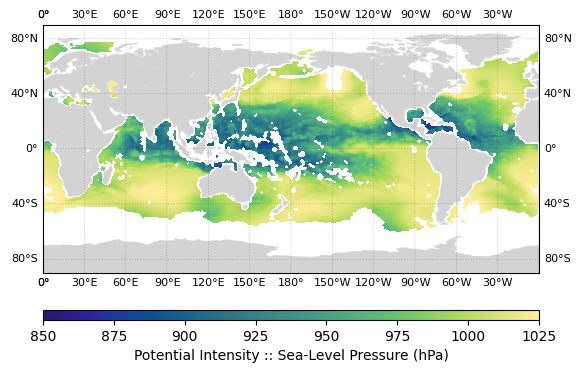

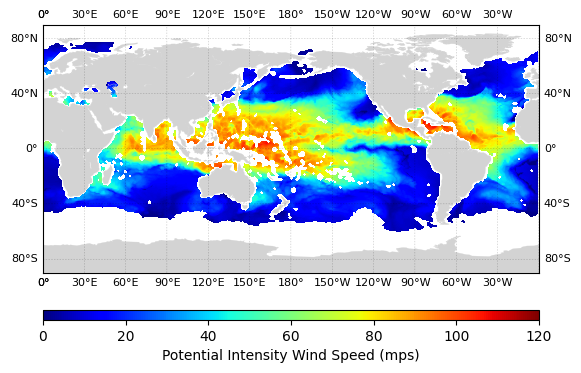

In [4]:
# Plot the TC PI minimum sea-level pressure metric.
levels = numpy.linspace(mslp_cmin, mslp_cmax, 255)
(basemap, x, y) = build_basemap(lat=tcpi.lats, lon=tcpi.lons)
draw_basemap(basemap=basemap)
basemap.contourf(x, y, tcpi.pmin.values, levels=levels, cmap=mslp_cmap)
ticks = numpy.arange(mslp_cmin, (mslp_cmax + 0.01), mslp_cint)
plt.colorbar(orientation="horizontal", ticks=ticks, pad=0.1,
    aspect=50, 
    label="Potential Intensity :: Sea-Level Pressure (hPa)")
plt.savefig("tcpi.pmin.png", dpi=500, transparent=True, bbox_inches="tight")
plt.show()   

# Plot the TC PI maximum wind speed metric.
levels = numpy.linspace(vmax_cmin, vmax_cmax, 255)
(basemap, x, y) = build_basemap(lat=tcpi.lats, lon=tcpi.lons)
draw_basemap(basemap=basemap)
basemap.contourf(x, y, tcpi.vmax.values, levels=levels, cmap=vmax_cmap)
ticks = numpy.arange(vmax_cmin, (vmax_cmax + 0.01), vmax_cint)
plt.colorbar(orientation="horizontal", ticks=ticks, pad=0.1,
            aspect=50, 
            label="Potential Intensity Wind Speed (mps)")
plt.savefig("tcpi.vmax.png", dpi=500, transparent=True, bbox_inches="tight")
plt.show()